# TP de Aprendizagem de Máquina
### Aluno: Geanderson Esteves dos Santos

Trabalho Prático 1
- Redes Neuronais + Backpropagation

Neste trabalho você irá implementar uma rede neuronal com três camadas:

1. Camada de entrada: cada unidade representa uma dimensão do dado de entrada.

2. Camada oculta: cada unidade representa uma transformação a partir das unidades de entrada.

3. Camada de saída: cada unidade representa a chance da saída correspondente ser a correta.

Você irá utilizar a função Sigmóide para obter não-linearidade. Além disso, a função de perda a ser minimizada é a seguinte:

onde m é a quantidade de entradas no treino, K é o número de saídas possíveis,  representa a saída correta de cada classe k em cada entrada (i), e similarmente representa a saída dada pela rede neuronal.

O dado a ser utilizado está anexado. Trata-se de 5000 entradas, onde cada entrada refere-se a um dígito escrito manualmente (i.e., MNIST dataset). Dessa forma, m=5000 e K=10. Cada entrada é dada por uma matriz de dimensões 28 por 28, ou seja, um vetor de 784 dimensões. A primeira coluna do arquivo sempre é o rótulo do dígito correto.

A rede neuronal a ser implementada deverá ter 784 unidades de entrada e 10 unidades de saída. Em seus experimentos, você deverá variar o número de unidades na camada oculta (25, 50, 100).

Além disso, você deverá comparar os seguintes algoritmos de cálculo de gradiente:

1. Gradient Descent: o gradiente é calculado após cada época (após as 5000 entradas serem processadas).

2. Stochastic Gradient Descent: o gradiente é calculado após cada entrada.

3. Mini-Batch: o gradiente é calculado após um certo número de entradas (considere 10 e 50).

Por fim, você também deverá variar a taxa de aprendizado: 0.5, 1, 10.

O documento a ser entregue deverá apresentar o resultado de seus experimentos. Ou seja, deverá apresentar discussão da variação do número de unidades na camada oculta para cada um dos três algoritmos de cálculo de gradiente. Você deverá apresentar gráficos mostrando a convergência do erro empírico para cada situação (unidades na camada oculta, algoritmo de cálculo do gradiente, taxa de aprendizado). Você deverá deixar claras todas as hipóteses que julgar serem pertinentes.

In [1]:
# Required packages.
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers

Using TensorFlow backend.


In [2]:
# Fix random seed for reproducibility.
seed = 7
np.random.seed(seed)

In [3]:
# Load data.
dataset = np.loadtxt("data_tp1", delimiter=",")
X_train = dataset[:, 1:].reshape(dataset.shape[0],1,28, 28).astype('float32')
y_train = dataset[:,0]
X_test = dataset[:,1:].reshape(dataset.shape[0],1, 28, 28).astype('float32')
y_test = dataset[:,0]

In [4]:
# An image is represented by 28*28 then it is a 784 in memory.
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
# Normalize inputs from 0-255 to 0-1.
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
# Define model
def baseline_model(unity, learning_rate):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(unity, input_dim=unity, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Set the gradient
    sgd = optimizers.SGD(lr=learning_rate)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Testes variando Gradient Descent (GD), Sthocastic Gradient Descent (SGD) e Mini-Batch
### Para efeito de comparação e seguindo as intruções do TP mostradas no primeiro item deste notebook.
##### 1 - Testar o learning rate (0.5, 1, 10) para os 3 gradientes (GD, SGD e Mini-Batch) variando o número de unidades da hidden layer (25, 50, 100). 
##### 2 - Realizar testes complementares variando parâmetros não previstos no enunciado do TP. 

In [8]:
# Set up the arrays with the inputs and outputs of the tests. 
inputsGD = []
inputsGD.append([])
inputsGD.append([])
inputsGD.append([])
inputsGD.append([])
outputsGD = []
outputsGD.append([])
outputsGD.append([])
outputsGD.append([])
outputsGD.append([])

In [9]:
inputsSGD = []
inputsSGD.append([])
inputsSGD.append([])
inputsSGD.append([])
inputsSGD.append([])
outputsSGD = []
outputsSGD.append([])
outputsSGD.append([])
outputsSGD.append([])
outputsSGD.append([])

In [10]:
inputsMiniBatch10 = []
inputsMiniBatch10.append([])
inputsMiniBatch10.append([])
inputsMiniBatch10.append([])
inputsMiniBatch10.append([])
outputsMiniBatch10 = []
outputsMiniBatch10.append([])
outputsMiniBatch10.append([])
outputsMiniBatch10.append([])
outputsMiniBatch10.append([])

In [11]:
inputsMiniBatch50 = []
inputsMiniBatch50.append([])
inputsMiniBatch50.append([])
inputsMiniBatch50.append([])
inputsMiniBatch50.append([])
outputsMiniBatch50 = []
outputsMiniBatch50.append([])
outputsMiniBatch50.append([])
outputsMiniBatch50.append([])
outputsMiniBatch50.append([])

In [12]:
# Use the model by parameters.
def use_model(lr, un, gradient, index, x_axis):
    
    for l, u in zip(lr, un):
        if x_axis == 'lr':
            x = l
        else:
            x = u
        
        if gradient == 'gd':
            inputsGD[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=5000, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsGD[index].append(100-scores[1]*100)
        elif gradient == 'sgd':
            inputsSGD[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsSGD[index].append(100-scores[1]*100)
        elif gradient == 'mb10':
            inputsMiniBatch10[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsMiniBatch10[index].append(100-scores[1]*100)
        elif gradient == 'mb50':
            inputsMiniBatch50[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=50, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsMiniBatch50[index].append(100-scores[1]*100)

In [13]:
# GD.
use_model([0.5, 1, 10], [25, 25, 25], 'gd', 0, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 177us/step - loss: 2.3074 - acc: 0.0932 - val_loss: 2.3034 - val_acc: 0.0922
Epoch 2/10
5000/5000 [==============================] - 0s 77us/step - loss: 2.3034 - acc: 0.0922 - val_loss: 2.3013 - val_acc: 0.0984
Epoch 3/10
5000/5000 [==============================] - 0s 74us/step - loss: 2.3013 - acc: 0.0984 - val_loss: 2.3001 - val_acc: 0.1164
Epoch 4/10
5000/5000 [==============================] - 0s 72us/step - loss: 2.3001 - acc: 0.1164 - val_loss: 2.2992 - val_acc: 0.1142
Epoch 5/10
5000/5000 [==============================] - 0s 79us/step - loss: 2.2992 - acc: 0.1142 - val_loss: 2.2985 - val_acc: 0.1142
Epoch 6/10
5000/5000 [==============================] - 0s 75us/step - loss: 2.2985 - acc: 0.1142 - val_loss: 2.2978 - val_acc: 0.1142
Epoch 7/10
5000/5000 [==============================] - 0s 77us/step - loss: 2.2979 - acc: 0.1142 - val_loss: 2.2972 - val_acc: 0.1142
Epoch 

In [14]:
# SGD.
use_model([0.5, 1, 10], [25, 25, 25], 'sgd', 0, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 41s 8ms/step - loss: 2.7933 - acc: 0.1034 - val_loss: 2.4675 - val_acc: 0.0912
Epoch 2/10
5000/5000 [==============================] - 40s 8ms/step - loss: 2.7268 - acc: 0.1774 - val_loss: 3.2827 - val_acc: 0.1994
Epoch 3/10
5000/5000 [==============================] - 39s 8ms/step - loss: 3.7887 - acc: 0.1952 - val_loss: 2.6824 - val_acc: 0.1844
Epoch 4/10
5000/5000 [==============================] - 40s 8ms/step - loss: 3.7805 - acc: 0.2342 - val_loss: 4.3088 - val_acc: 0.1616
Epoch 5/10
5000/5000 [==============================] - 38s 8ms/step - loss: 3.7428 - acc: 0.2444 - val_loss: 3.1042 - val_acc: 0.2348
Epoch 6/10
5000/5000 [==============================] - 38s 8ms/step - loss: 3.8826 - acc: 0.2518 - val_loss: 4.0498 - val_acc: 0.2544
Epoch 7/10
5000/5000 [==============================] - 38s 8ms/step - loss: 4.2614 - acc: 0.1782 - val_loss: 4.6694 - val_acc: 0.1734
Epoch 8

In [15]:
# MB10.
use_model([0.5, 1, 10], [25, 25, 25], 'mb10', 0, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 7s 1ms/step - loss: 1.6585 - acc: 0.3894 - val_loss: 0.8566 - val_acc: 0.7328
Epoch 2/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.6606 - acc: 0.7708 - val_loss: 0.4516 - val_acc: 0.8622
Epoch 3/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.4501 - acc: 0.8524 - val_loss: 0.3980 - val_acc: 0.8728
Epoch 4/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.3488 - acc: 0.8908 - val_loss: 0.2739 - val_acc: 0.9136
Epoch 5/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.2885 - acc: 0.9086 - val_loss: 0.2600 - val_acc: 0.9116
Epoch 6/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.2305 - acc: 0.9278 - val_loss: 0.2232 - val_acc: 0.9236
Epoch 7/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.1951 - acc: 0.9398 - val_loss: 0.1412 - val_acc: 0.9574
Epoch 8/10
500

In [16]:
# MB50.
use_model([0.5, 1, 10], [25, 25, 25], 'mb50', 0, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 2s 428us/step - loss: 2.2256 - acc: 0.1938 - val_loss: 1.9754 - val_acc: 0.2882
Epoch 2/10
5000/5000 [==============================] - 1s 269us/step - loss: 1.5745 - acc: 0.4516 - val_loss: 1.0908 - val_acc: 0.6374
Epoch 3/10
5000/5000 [==============================] - 1s 268us/step - loss: 0.9171 - acc: 0.6978 - val_loss: 0.6740 - val_acc: 0.7946
Epoch 4/10
5000/5000 [==============================] - 1s 269us/step - loss: 0.6504 - acc: 0.7924 - val_loss: 0.5904 - val_acc: 0.8164
Epoch 5/10
5000/5000 [==============================] - 1s 262us/step - loss: 0.5337 - acc: 0.8400 - val_loss: 0.5725 - val_acc: 0.8206
Epoch 6/10
5000/5000 [==============================] - 1s 273us/step - loss: 0.4629 - acc: 0.8568 - val_loss: 0.4264 - val_acc: 0.8774
Epoch 7/10
5000/5000 [==============================] - 1s 273us/step - loss: 0.4150 - acc: 0.8728 - val_loss: 0.4054 - val_acc: 0.8752


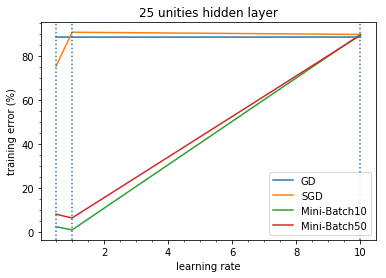

In [17]:
index = 0

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("25 unities hidden layer")
plt.legend()
plt.show()

In [18]:
# GD.
use_model([0.5, 1, 10], [50, 50, 50], 'gd', 1, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 197us/step - loss: 2.3046 - acc: 0.1024 - val_loss: 2.3006 - val_acc: 0.1142
Epoch 2/10
5000/5000 [==============================] - 0s 76us/step - loss: 2.3006 - acc: 0.1142 - val_loss: 2.2994 - val_acc: 0.1142
Epoch 3/10
5000/5000 [==============================] - 0s 74us/step - loss: 2.2994 - acc: 0.1142 - val_loss: 2.2984 - val_acc: 0.1142
Epoch 4/10
5000/5000 [==============================] - 0s 74us/step - loss: 2.2984 - acc: 0.1142 - val_loss: 2.2974 - val_acc: 0.1142
Epoch 5/10
5000/5000 [==============================] - 0s 77us/step - loss: 2.2974 - acc: 0.1142 - val_loss: 2.2963 - val_acc: 0.1142
Epoch 6/10
5000/5000 [==============================] - 0s 76us/step - loss: 2.2963 - acc: 0.1142 - val_loss: 2.2953 - val_acc: 0.1142
Epoch 7/10
5000/5000 [==============================] - 0s 73us/step - loss: 2.2953 - acc: 0.1142 - val_loss: 2.2942 - val_acc: 0.1142
Epoch 

In [19]:
# SGD.
use_model([0.5, 1, 10], [50, 50, 50], 'sgd', 1, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 40s 8ms/step - loss: 14.4105 - acc: 0.1056 - val_loss: 14.4096 - val_acc: 0.1060
Epoch 2/10
5000/5000 [==============================] - 38s 8ms/step - loss: 14.4096 - acc: 0.1060 - val_loss: 14.4096 - val_acc: 0.1060
Epoch 3/10
5000/5000 [==============================] - 38s 8ms/step - loss: 14.4096 - acc: 0.1060 - val_loss: 14.4096 - val_acc: 0.1060
Epoch 4/10
5000/5000 [==============================] - 39s 8ms/step - loss: 14.4096 - acc: 0.1060 - val_loss: 14.4096 - val_acc: 0.1060
Epoch 5/10
5000/5000 [==============================] - 40s 8ms/step - loss: 14.4096 - acc: 0.1060 - val_loss: 14.4096 - val_acc: 0.1060
Epoch 6/10
5000/5000 [==============================] - 39s 8ms/step - loss: 14.4096 - acc: 0.1060 - val_loss: 14.4096 - val_acc: 0.1060
Epoch 7/10
5000/5000 [==============================] - 36s 7ms/step - loss: 14.4096 - acc: 0.1060 - val_loss: 14.4096 - val_acc: 

In [20]:
# MB10.
use_model([0.5, 1, 10], [50, 50, 50], 'mb10', 1, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 7s 1ms/step - loss: 1.5751 - acc: 0.4170 - val_loss: 0.6321 - val_acc: 0.8060
Epoch 2/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.6054 - acc: 0.7992 - val_loss: 0.4317 - val_acc: 0.8612
Epoch 3/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.4149 - acc: 0.8660 - val_loss: 0.3285 - val_acc: 0.8944
Epoch 4/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.3185 - acc: 0.8988 - val_loss: 0.2409 - val_acc: 0.9246
Epoch 5/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.2562 - acc: 0.9186 - val_loss: 0.1800 - val_acc: 0.9454
Epoch 6/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.2097 - acc: 0.9332 - val_loss: 0.1593 - val_acc: 0.9452
Epoch 7/10
5000/5000 [==============================] - 5s 989us/step - loss: 0.1701 - acc: 0.9486 - val_loss: 0.1252 - val_acc: 0.9620
Epoch 8/10
5

In [21]:
# MB50.
use_model([0.5, 1, 10], [50, 50, 50], 'mb50', 1, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 3s 553us/step - loss: 2.2163 - acc: 0.1740 - val_loss: 1.8649 - val_acc: 0.3600
Epoch 2/10
5000/5000 [==============================] - 2s 322us/step - loss: 1.4075 - acc: 0.5048 - val_loss: 1.0560 - val_acc: 0.6588
Epoch 3/10
5000/5000 [==============================] - 2s 329us/step - loss: 0.8180 - acc: 0.7220 - val_loss: 0.6334 - val_acc: 0.7964
Epoch 4/10
5000/5000 [==============================] - 2s 317us/step - loss: 0.6036 - acc: 0.8030 - val_loss: 0.5328 - val_acc: 0.8378
Epoch 5/10
5000/5000 [==============================] - 2s 322us/step - loss: 0.5032 - acc: 0.8422 - val_loss: 0.4476 - val_acc: 0.8640
Epoch 6/10
5000/5000 [==============================] - 2s 308us/step - loss: 0.4395 - acc: 0.8604 - val_loss: 0.3776 - val_acc: 0.8810
Epoch 7/10
5000/5000 [==============================] - 2s 320us/step - loss: 0.3924 - acc: 0.8788 - val_loss: 0.3462 - val_acc: 0.8904


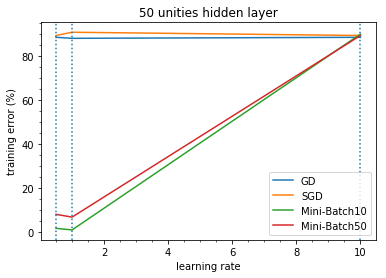

In [22]:
index = 1

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("50 unities hidden layer")
plt.legend()
plt.show()

In [23]:
# GD.
use_model([0.5, 1, 10], [100, 100, 100], 'gd', 2, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 247us/step - loss: 2.3589 - acc: 0.1000 - val_loss: 2.3117 - val_acc: 0.1142
Epoch 2/10
5000/5000 [==============================] - 0s 88us/step - loss: 2.3117 - acc: 0.1142 - val_loss: 2.2982 - val_acc: 0.1252
Epoch 3/10
5000/5000 [==============================] - 0s 78us/step - loss: 2.2982 - acc: 0.1252 - val_loss: 2.2946 - val_acc: 0.1142
Epoch 4/10
5000/5000 [==============================] - 0s 78us/step - loss: 2.2946 - acc: 0.1142 - val_loss: 2.2920 - val_acc: 0.1806
Epoch 5/10
5000/5000 [==============================] - 0s 76us/step - loss: 2.2920 - acc: 0.1806 - val_loss: 2.2897 - val_acc: 0.1142
Epoch 6/10
5000/5000 [==============================] - 0s 77us/step - loss: 2.2897 - acc: 0.1142 - val_loss: 2.2874 - val_acc: 0.1316
Epoch 7/10
5000/5000 [==============================] - 0s 77us/step - loss: 2.2874 - acc: 0.1316 - val_loss: 2.2852 - val_acc: 0.1148
Epoch 

In [24]:
# SGD.
use_model([0.5, 1, 10], [100, 100, 100], 'sgd', 2, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 50s 10ms/step - loss: 6.3002 - acc: 0.1522 - val_loss: 3.7714 - val_acc: 0.2734
Epoch 2/10
5000/5000 [==============================] - 43s 9ms/step - loss: 7.5212 - acc: 0.3306 - val_loss: 11.7444 - val_acc: 0.2312
Epoch 3/10
5000/5000 [==============================] - 46s 9ms/step - loss: 12.3975 - acc: 0.2132 - val_loss: 12.8062 - val_acc: 0.2006
Epoch 4/10
5000/5000 [==============================] - 51s 10ms/step - loss: 12.8197 - acc: 0.2044 - val_loss: 12.8016 - val_acc: 0.2056
Epoch 5/10
5000/5000 [==============================] - 58s 12ms/step - loss: 13.0160 - acc: 0.1902 - val_loss: 12.1681 - val_acc: 0.2130
Epoch 6/10
5000/5000 [==============================] - 47s 9ms/step - loss: 12.6413 - acc: 0.2126 - val_loss: 12.7989 - val_acc: 0.2056
Epoch 7/10
5000/5000 [==============================] - 38s 8ms/step - loss: 12.8138 - acc: 0.2042 - val_loss: 12.7977 - val_acc: 

In [25]:
# MB10.
use_model([0.5, 1, 10], [100, 100, 100], 'mb10', 2, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 6s 1ms/step - loss: 1.7860 - acc: 0.3474 - val_loss: 0.8046 - val_acc: 0.7026
Epoch 2/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.6406 - acc: 0.7828 - val_loss: 0.4879 - val_acc: 0.8468
Epoch 3/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.4203 - acc: 0.8672 - val_loss: 0.3595 - val_acc: 0.8884
Epoch 4/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.3254 - acc: 0.8968 - val_loss: 0.2338 - val_acc: 0.9256
Epoch 5/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.2657 - acc: 0.9148 - val_loss: 0.2066 - val_acc: 0.9374
Epoch 6/10
5000/5000 [==============================] - 5s 990us/step - loss: 0.2251 - acc: 0.9276 - val_loss: 0.1626 - val_acc: 0.9480
Epoch 7/10
5000/5000 [==============================] - 5s 994us/step - loss: 0.1779 - acc: 0.9438 - val_loss: 0.1714 - val_acc: 0.9456
Epoch 8/10

In [26]:
# MB50.
use_model([0.5, 1, 10], [100, 100, 100], 'mb50', 2, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 3s 530us/step - loss: 2.1401 - acc: 0.2234 - val_loss: 1.7159 - val_acc: 0.4326
Epoch 2/10
5000/5000 [==============================] - 1s 286us/step - loss: 1.1632 - acc: 0.5892 - val_loss: 0.8629 - val_acc: 0.6702
Epoch 3/10
5000/5000 [==============================] - 1s 280us/step - loss: 0.7160 - acc: 0.7574 - val_loss: 0.6392 - val_acc: 0.8054
Epoch 4/10
5000/5000 [==============================] - 1s 290us/step - loss: 0.5363 - acc: 0.8198 - val_loss: 0.4544 - val_acc: 0.8522
Epoch 5/10
5000/5000 [==============================] - 1s 287us/step - loss: 0.4678 - acc: 0.8486 - val_loss: 0.3968 - val_acc: 0.8718
Epoch 6/10
5000/5000 [==============================] - 1s 258us/step - loss: 0.4185 - acc: 0.8670 - val_loss: 0.3747 - val_acc: 0.8864
Epoch 7/10
5000/5000 [==============================] - 2s 386us/step - loss: 0.3704 - acc: 0.8816 - val_loss: 0.3153 - val_acc: 0.9008


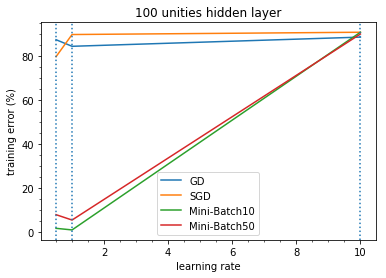

In [27]:
index = 2

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("100 unities hidden layer")
plt.legend()
plt.show()

Text(0.5,1,'100 unities hidden layer')

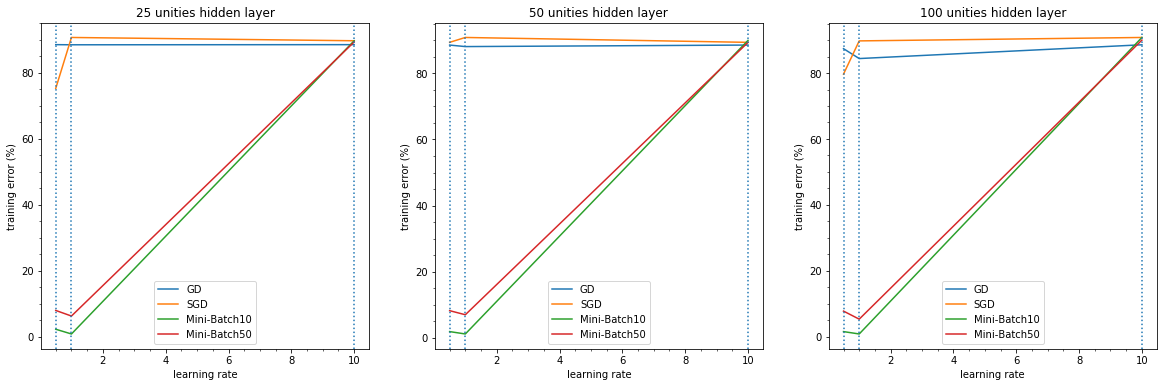

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
ax1.plot(inputsGD[0], outputsGD[0], label='GD')
ax1.plot(inputsSGD[0], outputsSGD[0], label='SGD')
ax1.plot(inputsMiniBatch10[0], outputsMiniBatch10[0], label='Mini-Batch10')
ax1.plot(inputsMiniBatch50[0], outputsMiniBatch50[0], label='Mini-Batch50')
ax1.axvline(x=0.5, ls='dotted')
ax1.axvline(x=1, ls='dotted')
ax1.axvline(x=10, ls='dotted')
ax1.minorticks_on()
ax1.legend()
ax1.set_xlabel('learning rate')
ax1.set_ylabel('training error (%)')
ax1.set_title('25 unities hidden layer')

ax2.plot(inputsGD[1], outputsGD[1], label='GD')
ax2.plot(inputsSGD[1], outputsSGD[1], label='SGD')
ax2.plot(inputsMiniBatch10[1], outputsMiniBatch10[1], label='Mini-Batch10')
ax2.plot(inputsMiniBatch50[1], outputsMiniBatch50[1], label='Mini-Batch50')
ax2.axvline(x=0.5, ls='dotted')
ax2.axvline(x=1, ls='dotted')
ax2.axvline(x=10, ls='dotted')
ax2.minorticks_on()
ax2.legend()
ax2.set_xlabel('learning rate')
ax2.set_ylabel('training error (%)')
ax2.set_title('50 unities hidden layer')

ax3.plot(inputsGD[2], outputsGD[2], label='GD')
ax3.plot(inputsSGD[2], outputsSGD[2], label='SGD')
ax3.plot(inputsMiniBatch10[2], outputsMiniBatch10[2], label='Mini-Batch10')
ax3.plot(inputsMiniBatch50[2], outputsMiniBatch50[2], label='Mini-Batch50')
ax3.axvline(x=0.5, ls='dotted')
ax3.axvline(x=1, ls='dotted')
ax3.axvline(x=10, ls='dotted')
ax3.minorticks_on()
ax3.legend()
ax3.set_xlabel('learning rate')
ax3.set_ylabel('training error (%)')
ax3.set_title('100 unities hidden layer')

# Discussão dos Resultados

Primeiramente, podemos notar nos gráficos apresentados acima que dois dos gradientes testados nunca obtiveram resultados interessantes para o problema de classificação de imagens (aka MNIS), i.e., GD e SGD obtiveram resultados muito ruins para o training error. As condições definidas no enunciado do TP podem ter influenciado diretamente os resultados desses dois gradientes em termos do uso da sigmoid para não linearidade e também do learning rate ter sido uma medida um pouco elevada (i.e., 0.5 foi o meno4 valor testado e 10 o maior valor testado). 
//Checar essa afirmação após os testes
A junção dos resultados é mostrada nos três gráficos gerados logo acima. Assim, o mini-batch foi o gradiente mais eficiente entre os testados, com destaque para o mini-batch de 10 batches que obteve resultados ligeiramente melhores do que o mini-batch de 50. 

O training error foi baixo se considerarmos que o conjunto de teste foi o próprio conjunto de treino, prática essa que deve ser evitada em casos reais de aplicação de algoritmos de machine learning no mundo real. Assim, embora o training error ter sido baixo em dois dos gradientes testados (i.e., mini-batch de 10 e 50), isso não significa que o nosso modelo seja bom, pois o test error pode ser alto. É importante notar que o learning rate de 10 sempre convergiu para os 4 tipos de gradientes testados, no sentido de que todos eles obtiveram resultados muitos ruins com este learning rate. Como vimos em sala de aula, muitos dos modelos de machine learning amplamente usados na academia usam um learning rate de 0.1. No entanto, a aplicação de um learning rate de 10 assim como no último dos testes realizados mostrou que este valor era altíssimo para o problema de classificação de imagens. Sendo que este learning rate obteve um training error de cerca de 90% para todos os 3 gradientes testados independente das outras métricas do modelo.

Desta forma, eu aprendi que em uma análise real do MNIST o mais adequado seria ter um conjunto de treino (assim como foi testado o modelo), um conjunto de teste, e mesmo a separação em um conjunto de validação com uma cross-validation seria o cenário perfeito de teste se estivéssemos tratando de um caso real de aplicação de machine learning. Em relação ao aumento das unidades da camada oculta para os três algoritmos, vamos realizar um teste exclusivo deste parâmetro para sabermos o seu real comportamento no conjunto de treino, para tal, o learning rate vai ser fixado em 0.5, que como visto nos três gráficos acima é o melhor learning rate obtido para quase todos gradientes. Somente o GD obteve resultados minimamente melhores com um learning rate de 1 em vez de 0.5. 

Como visto no gráfico abaixo, o aumento no número de unidades da camada oculta é relevante para o mini-batch de 10, onde os melhores resultados são encontrados com 100 unidades na camada oculta. Todavia, este aumento não se mostrou relevante para os outros gradientes, detalhe para o mini-batch de 50 que obteve piores resultados com 100 unidades na camada oculta do que com somente 50 (que foram os melhores resultados obtidos por esse gradiente). 

In [29]:
# GD.
use_model([0.5, 0.5, 0.5], [25, 50, 100], 'gd', 3, 'un')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 292us/step - loss: 2.3100 - acc: 0.1014 - val_loss: 2.3031 - val_acc: 0.1074
Epoch 2/10
5000/5000 [==============================] - 0s 72us/step - loss: 2.3031 - acc: 0.1074 - val_loss: 2.3007 - val_acc: 0.1160
Epoch 3/10
5000/5000 [==============================] - 0s 71us/step - loss: 2.3007 - acc: 0.1160 - val_loss: 2.2996 - val_acc: 0.1142
Epoch 4/10
5000/5000 [==============================] - 0s 91us/step - loss: 2.2996 - acc: 0.1142 - val_loss: 2.2989 - val_acc: 0.1142
Epoch 5/10
5000/5000 [==============================] - 0s 70us/step - loss: 2.2989 - acc: 0.1142 - val_loss: 2.2984 - val_acc: 0.1142
Epoch 6/10
5000/5000 [==============================] - 0s 72us/step - loss: 2.2984 - acc: 0.1142 - val_loss: 2.2979 - val_acc: 0.1142
Epoch 7/10
5000/5000 [==============================] - 0s 72us/step - loss: 2.2979 - acc: 0.1142 - val_loss: 2.2975 - val_acc: 0.1142
Epoch 

In [30]:
# SGD.
use_model([0.5, 0.5, 0.5], [25, 50, 100], 'sgd', 3, 'un')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 41s 8ms/step - loss: 2.5235 - acc: 0.1400 - val_loss: 2.2599 - val_acc: 0.1728
Epoch 2/10
5000/5000 [==============================] - 44s 9ms/step - loss: 2.1308 - acc: 0.2082 - val_loss: 2.2438 - val_acc: 0.1922
Epoch 3/10
5000/5000 [==============================] - 55s 11ms/step - loss: 2.1634 - acc: 0.1978 - val_loss: 2.3069 - val_acc: 0.2118
Epoch 4/10
5000/5000 [==============================] - 54s 11ms/step - loss: 2.3357 - acc: 0.1840 - val_loss: 2.0898 - val_acc: 0.2390
Epoch 5/10
5000/5000 [==============================] - 54s 11ms/step - loss: 2.4373 - acc: 0.1758 - val_loss: 2.3214 - val_acc: 0.1000
Epoch 6/10
5000/5000 [==============================] - 50s 10ms/step - loss: 2.4134 - acc: 0.1728 - val_loss: 2.2551 - val_acc: 0.2030
Epoch 7/10
5000/5000 [==============================] - 61s 12ms/step - loss: 2.2570 - acc: 0.2084 - val_loss: 2.1102 - val_acc: 0.2440
Ep

In [31]:
# MB10.
use_model([0.5, 0.5, 0.5], [25, 50, 100], 'mb10', 3, 'un')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 11s 2ms/step - loss: 1.6100 - acc: 0.4010 - val_loss: 0.7278 - val_acc: 0.7758
Epoch 2/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.6471 - acc: 0.7868 - val_loss: 0.4318 - val_acc: 0.8670
Epoch 3/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.4561 - acc: 0.8582 - val_loss: 0.4182 - val_acc: 0.8646
Epoch 4/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.3650 - acc: 0.8838 - val_loss: 0.2859 - val_acc: 0.9116
Epoch 5/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2965 - acc: 0.9074 - val_loss: 0.2176 - val_acc: 0.9330
Epoch 6/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2559 - acc: 0.9178 - val_loss: 0.2126 - val_acc: 0.9274
Epoch 7/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.2086 - acc: 0.9312 - val_loss: 0.1520 - val_acc: 0.9516
Epoch 8/10
50

In [32]:
# MB50.
use_model([0.5, 0.5, 0.5], [25, 50, 100], 'mb50', 3, 'un')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 4s 731us/step - loss: 2.2422 - acc: 0.1714 - val_loss: 2.1183 - val_acc: 0.2342
Epoch 2/10
5000/5000 [==============================] - 2s 338us/step - loss: 1.5608 - acc: 0.4452 - val_loss: 1.1642 - val_acc: 0.5820
Epoch 3/10
5000/5000 [==============================] - 2s 368us/step - loss: 0.9577 - acc: 0.6814 - val_loss: 0.7973 - val_acc: 0.7296
Epoch 4/10
5000/5000 [==============================] - 2s 323us/step - loss: 0.7020 - acc: 0.7668 - val_loss: 0.5898 - val_acc: 0.8254
Epoch 5/10
5000/5000 [==============================] - 2s 322us/step - loss: 0.5692 - acc: 0.8210 - val_loss: 0.5043 - val_acc: 0.8478
Epoch 6/10
5000/5000 [==============================] - 2s 343us/step - loss: 0.4892 - acc: 0.8464 - val_loss: 0.4841 - val_acc: 0.8420
Epoch 7/10
5000/5000 [==============================] - 2s 316us/step - loss: 0.4307 - acc: 0.8668 - val_loss: 0.4843 - val_acc: 0.8434


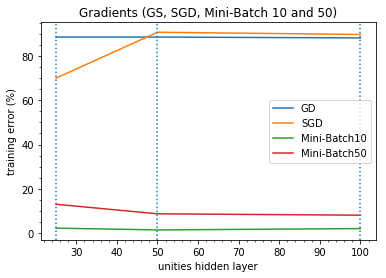

In [33]:
index = 3

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('unities hidden layer')
plt.axvline(x=25, ls='dotted')
plt.axvline(x=50, ls='dotted')
plt.axvline(x=100, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Gradients (GS, SGD, Mini-Batch 10 and 50)")
plt.legend()
plt.show()

# Testes Complementares

#### Apesar de não estar previsto no enunciado do TP, vamos variar alguns dos parâmetros:

## <span style="color:blue"> Setar para somente uma única época comparando com learning rate </span>

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 13s 3ms/step - loss: 1.7046 - acc: 0.3694 - val_loss: 0.9791 - val_acc: 0.6604
33.96000000000001
Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 12s 2ms/step - loss: 2.2059 - acc: 0.1966 - val_loss: 1.5606 - val_acc: 0.3756
62.44
Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 10s 2ms/step - loss: 14.4884 - acc: 0.0994 - val_loss: 14.5063 - val_acc: 0.1000
90.0


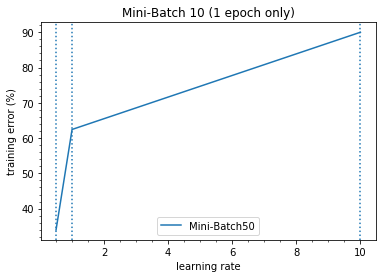

In [34]:
lr = [0.5, 1, 10]
un = [100, 100, 100]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(lr, outputs, label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Mini-Batch 10 (1 epoch only)")
plt.legend()
plt.show()

### Discussão sobre setar somente uma época para execução do modelo (variando o learning rate): Com apenas uma época os resultados são piores do que com 10 épocas que foi a metodologia adotada durante todos os experimentos do trabalho. 

## <span style="color:blue">Setar para somente uma única época comparando com as unidades da camada oculta</span>

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 10s 2ms/step - loss: 2.0826 - acc: 0.2232 - val_loss: 1.4077 - val_acc: 0.4422
55.78
Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 10s 2ms/step - loss: 1.9692 - acc: 0.2734 - val_loss: 1.1504 - val_acc: 0.5672
43.279999999999994
Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 11s 2ms/step - loss: 14.5738 - acc: 0.0920 - val_loss: 14.6288 - val_acc: 0.0924
90.76


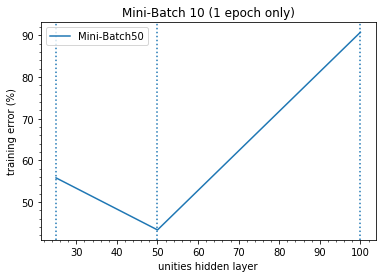

In [35]:
lr = [1, 1, 1]
un = [25, 50, 100]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(un, outputs, label='Mini-Batch50')
plt.xlabel('unities hidden layer')
plt.axvline(x=25, ls='dotted')
plt.axvline(x=50, ls='dotted')
plt.axvline(x=100, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Mini-Batch 10 (1 epoch only)")
plt.legend()
plt.show()

### Discussão sobre setar somente uma época para execução do modelo (variando as unidades da camada oculta): Com apenas uma época os resultados são piores do que com 10 épocas que foi a metodologia adotada durante todos os experimentos do trabalho. 

## Setar o learning rate para 0.2

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 9s 2ms/step - loss: 1.9099 - acc: 0.3246 - val_loss: 1.0625 - val_acc: 0.6340
Epoch 2/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.8214 - acc: 0.7290 - val_loss: 0.6077 - val_acc: 0.8038
Epoch 3/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.5609 - acc: 0.8198 - val_loss: 0.4326 - val_acc: 0.8644
Epoch 4/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.4415 - acc: 0.8634 - val_loss: 0.4297 - val_acc: 0.8666
Epoch 5/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.3874 - acc: 0.8764 - val_loss: 0.3790 - val_acc: 0.8818
Epoch 6/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.3407 - acc: 0.8948 - val_loss: 0.3047 - val_acc: 0.9032
Epoch 7/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.3042 - acc: 0.9016 - val_loss: 0.2388 - val_acc: 0.9274
Epoch 8/10
500

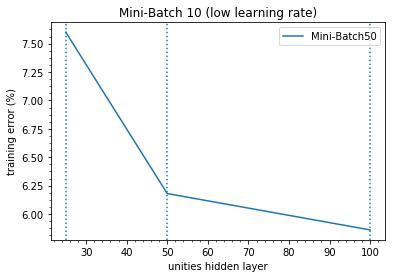

In [36]:
lr = [0.2, 0.2, 0.2]
un = [25, 50, 100]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(un, outputs, label='Mini-Batch50')
plt.xlabel('unities hidden layer')
plt.axvline(x=25, ls='dotted')
plt.axvline(x=50, ls='dotted')
plt.axvline(x=100, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Mini-Batch 10 (low learning rate)")
plt.legend()
plt.show()

### Discussão sobre diminuir o learning rate: Com apenas uma época os resultados são piores do que com 10 épocas que foi a metodologia adotada durante todos os experimentos do trabalho. 